<!-- # Packages -->

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

<!-- # Input -->


In [2]:
DataType = "CarEvaluation"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "RFA0")
RandomForestResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "PLA0")
AnalyzedDataUNREALDUREAL = LoadAnalyzedData("Iris", BaseDirectory, "TreeFarms", 0.005)
# AnalyzedDataUNREALDUREAL = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)

<!-- # Shape -->

In [3]:
ShapeTable = {"DUREAL":[AnalyzedDataUNREALDUREAL["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedDataUNREALDUREAL["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable

,DUREAL,UNREAL
0,100,100


<!-- # Run Time -->

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
# TimeTable.index = range(10,30,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
0,0.16,0.16,0.32,0.32


<!-- # Error Vec -->

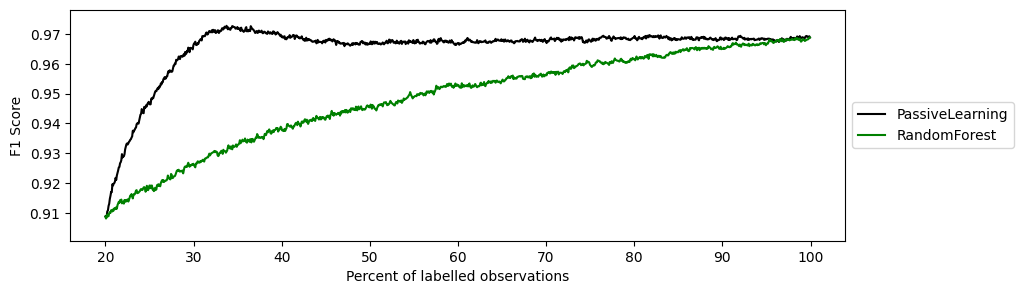

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedDataUNREALDUREAL['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL": "orange",
    "UNREAL": "blue"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL": "solid",
    "UNREAL": "solid"
}

LegendMapping = {
    "DUREAL0": "DUREAL (ε = 0.xxx)",
    "UNREAL0": "UNREAL (ε = 0.xxx)",
}

# markerstyles = {
#     "PassiveLearning": "^",
#     "RandomForest": "^",
#     "DUREAL": "^",
#     "UNREAL": "^"
# }

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 PassiveLearning = PassiveLearningRF["Error"],
                 RandomForest = RandomForestResults["Error"],
                #  DUREAL = AnalyzedDataUNREALDUREAL["Error_DUREAL"],
                #  UNREAL = AnalyzedDataUNREALDUREAL["Error_UNREAL"],
                 Colors = colors,
                LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                #  Markerstyles = markerstyles,
                # xlim = [20,25],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                #  FigSize = (10,10),
                 CriticalValue = 1.96)

<!-- # Wilcoxon Ranked Signed Test -->

In [6]:
# WRSTResults = WilcoxonRankSignedTest({
#     "PassiveLearning" :PassiveLearningRF["Error"],
#     "RandomForest" : RandomForestResults["Error"],
#     "UNREAL" : AnalyzedDataUNREALDUREAL["Error_UNREAL"],
#     "DUREAL" : AnalyzedDataUNREALDUREAL["Error_DUREAL"]},
#     5)

# WRSTResults_LatexTable = WRSTResults.to_latex()
# print(WRSTResults_LatexTable)

<!-- # Input -->

<!-- # Selection History -->

In [7]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForestResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREAL.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREAL.sort_values(by = "AverageRank").head()

,AverageRank,a1_high,a1_low,a1_med,a2_high,a2_low,a2_med,a3_2,a3_3,a3_4,a4_2,a4_4,a5_big,a5_med,a6_high,a6_low,Y
129,31.671642,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
8,33.228571,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
127,38.800000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
106,38.841270,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112,40.237288,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


<!-- # Tree Counts -->

In [8]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

NameError: name 'AnalyzedDataSmall' is not defined

<!-- # Number of All Trees -->

In [ ]:
### Line Styles ###
linestyles = {"DUREAL005" : "solid",
"DUREAL010" : "solid",
"DUREAL015" : "solid",
"DUREAL020" : "solid",
"DUREAL025" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL010 = np.log(AnalyzedData010["TreeCounts_ALL_UNREAL"]),
                 DUREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
                 DUREAL020 = np.log(AnalyzedData020["TreeCounts_ALL_UNREAL"]),
                 DUREAL025 = np.log(AnalyzedData025["TreeCounts_ALL_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of All Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.2,
                 VarInput = False,
                 CriticalValue = 1.96)

<!-- ## Number of Unique Trees -->

In [ ]:
### Linetype ###
linestyles = {"UNREAL010" : "solid",
"UNREAL015" : "solid",
"UNREAL020" : "solid",
"UNREAL025" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL010 = np.log(AnalyzedData010["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL015 = np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL020 = np.log(AnalyzedData020["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL025 = np.log(AnalyzedData025["TreeCounts_UNIQUE_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Unique Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 VarInput = False,
                 CriticalValue = 1.96)